In [45]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

from src.cocycles_linear_algebra import *
from src.local_PCA import *
from src.approx_cocycles import *
from src.linear_systems_modp import *
from src.cocycles_linear_algebra import *

In [30]:
# load the dataset

f = open('./data/clocks.pckl', 'rb')
imgs = pickle.load(f)
f.close()

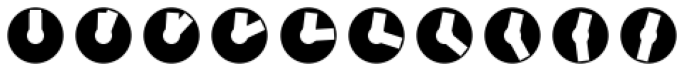

In [31]:
# display a few images
n = 10

_, axs = plt.subplots(1, n, figsize=(12, 12))
axs = axs.flatten()

for i in range(0,n) :
    axs[i].imshow(np.reshape(imgs[i],(40,40)), cmap='gray')
    axs[i].axis('off')
plt.show()

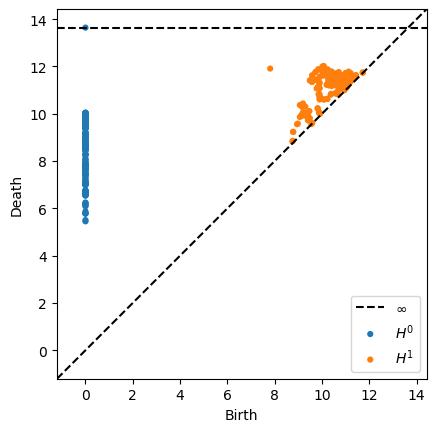

In [33]:
# compute persistence diagram and display it

ripser_out = ripser(imgs, coeff=2, do_cocycles = True)
diagrams = ripser_out['dgms']
plot_diagrams(diagrams, show=True, labels=["$H^0$","$H^1$"])

In [8]:
# do local PCA to get an approximate local trivialization

components = local_pca(7, imgs, n_components = 2)

To recover 0.75 of the variance, need 2.3 dimensions on averge.
With 2 components, recover 0.6151098 of the variance on averge.


In [9]:
# compute an approximate cocycle given by the local trivialization
# compute the homological death so that it is a 2-approximate cocycle and display the death time
# compute the first Stiefel--Whitney class of the cocycle

dth = approx_cocycle_vr_death(imgs, components, tolerance = 1.999)
cocycle = approx_sw1_vr_from_local_bases(imgs, components, dth)
print(dth)

9.503811


In [10]:
# write the first Stiefel--Whitney class in the basis given by the persistent cohomology computation

dgm1 = diagrams[1]
a = matrix_from_vertices_gen_cocycle(imgs, ripser_out['cocycles'][1], dgm1[:,1], cocycle, dth)
sol = solve_system_mod(a, mod = 2)

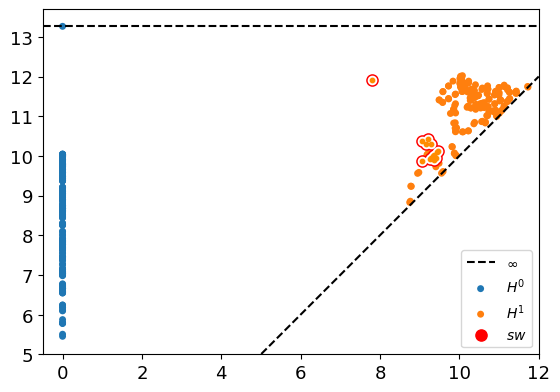

In [62]:
# display the persistence diagrams with the classes that sum to the first Stiefel--Whitney class highlighted

n_gens = len(ripser_out['cocycles'][1])
appear = np.nonzero(sol[:n_gens])

plt.rcParams.update({'font.size' : 13})
plot_diagrams(diagrams, show = False, labels=["$H^0$","$H^1$"], size = 25, xy_range=[-0.5,12,5,13.7])
ax = plt.gca()
ax.scatter(dgm1[appear, 0], dgm1[appear, 1], 65, 'r', 'o', label="$sw$")
ax.scatter(dgm1[appear, 0], dgm1[appear, 1], 35, 'w', 'o')
ax.scatter(dgm1[appear, 0], dgm1[appear, 1], 10, 'darkorange', 'o')
ax.legend()
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()